In [99]:
import pandas as pd

# 파일 경로 설정
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"

# CSV 파일 로드
df = pd.read_csv(train_path)

# 컬럼별 결측치 개수 및 비율 확인
missing_values = df.isnull().sum()  # 결측치 개수
missing_ratio = (missing_values / len(df)) * 100  # 결측치 비율 (%)

# 결측치가 있는 컬럼만 출력
missing_df = pd.DataFrame({
    "컬럼명": df.columns,
    "결측치 개수": missing_values.values,
    "결측치 비율(%)": missing_ratio.values
})

missing_df = missing_df[missing_df["결측치 개수"] > 0].reset_index(drop=True)

# 결과 출력
if missing_df.empty:
    print("✅ 데이터에 결측치가 없습니다!")
else:
    print("\n📌 컬럼별 결측치 현황")
    print(missing_df.to_string(index=False))


📌 컬럼별 결측치 현황
                  컬럼명  결측치 개수  결측치 비율(%)
임신 시도 또는 마지막 임신 경과 연수  246979  96.344827
          단일 배아 이식 여부    6291   2.454076
     착상 전 유전 검사 사용 여부  253631  98.939727
     착상 전 유전 진단 사용 여부    6291   2.454076
          배아 생성 주요 이유    6291   2.454076
            총 생성 배아 수    6291   2.454076
           미세주입된 난자 수    6291   2.454076
      미세주입에서 생성된 배아 수    6291   2.454076
             이식된 배아 수    6291   2.454076
         미세주입 배아 이식 수    6291   2.454076
             저장된 배아 수    6291   2.454076
      미세주입 후 저장된 배아 수    6291   2.454076
             해동된 배아 수    6291   2.454076
              해동 난자 수    6291   2.454076
          수집된 신선 난자 수    6291   2.454076
          저장된 신선 난자 수    6291   2.454076
             혼합된 난자 수    6291   2.454076
     파트너 정자와 혼합된 난자 수    6291   2.454076
     기증자 정자와 혼합된 난자 수    6291   2.454076
          동결 배아 사용 여부    6291   2.454076
          신선 배아 사용 여부    6291   2.454076
          기증 배아 사용 여부    6291   2.454076
               대리모 여부    6291   2.454076
  

In [101]:
import pandas as pd

# 📌 파일 로드
train_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/train.csv"
df = pd.read_csv(train_path)

# 📌 DI 데이터 필터링 (시술 유형이 DI인 데이터만 선택)
df_DI = df[df["시술 유형"] == "DI"].copy()

# 📌 기준 변수 (DI에서 시행하지 않는 확실한 변수 중 하나)
base_missing_var = "혼합된 난자 수"

# 📌 확인해야 하는 추가 결측 변수 리스트 (개별적으로 확인할 변수들)
check_missing_vars = [
    "임신 시도 또는 마지막 임신 경과 연수", "PGD 시술 여부", "PGS 시술 여부", "난자 채취 경과일", 
    "난자 해동 경과일", "난자 혼합 경과일", "배아 이식 경과일", "배아 해동 경과일", "착상 전 유전 검사 사용 여부"
]

# 📌 "혼합된 난자 수"가 결측인 행 찾기
base_missing_rows = df_DI[base_missing_var].isnull()

# 📌 결과 저장을 위한 리스트
results = []

# 📌 각 확인 변수별로 "혼합된 난자 수" 결측 행에서 동일하게 결측인지 확인
for var in check_missing_vars:
    var_missing_rows = df_DI[var].isnull()  # 현재 변수의 결측 여부
    matching_rows = base_missing_rows & var_missing_rows  # 기준 변수와 해당 변수 모두 결측인 행 찾기

    # 📌 개별 변수의 일치율 계산
    total_base_missing = base_missing_rows.sum()
    matching_count = matching_rows.sum()
    matching_ratio = (matching_count / total_base_missing) * 100  # 백분율 변환

    # 📌 결과 저장
    results.append([var, matching_count, total_base_missing, matching_ratio])

# 📌 결과를 DataFrame으로 변환
results_df = pd.DataFrame(results, columns=["변수명", "일치하는 행 개수", "총 기준 결측 행 개수", "일치율(%)"])

# 📌 결과 출력
print("\n📌 각 변수별 '혼합된 난자 수' 결측 행과 동일한 결측 여부:")
print(results_df.to_string(index=False))


📌 각 변수별 '혼합된 난자 수' 결측 행과 동일한 결측 여부:
                  변수명  일치하는 행 개수  총 기준 결측 행 개수     일치율(%)
임신 시도 또는 마지막 임신 경과 연수       5988          6291  95.183596
            PGD 시술 여부       6291          6291 100.000000
            PGS 시술 여부       6291          6291 100.000000
            난자 채취 경과일       6291          6291 100.000000
            난자 해동 경과일       6291          6291 100.000000
            난자 혼합 경과일       6291          6291 100.000000
            배아 이식 경과일       6291          6291 100.000000
            배아 해동 경과일       6291          6291 100.000000
     착상 전 유전 검사 사용 여부       6291          6291 100.000000


In [103]:
import pandas as pd


# 📌 결측치 6291개로 동일한 컬럼 리스트
missing_6291_columns = [
    "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "총 생성 배아 수", 
    "미세주입된 난자 수", "미세주입에서 생성된 배아 수", "이식된 배아 수", "미세주입 배아 이식 수", 
    "저장된 배아 수", "미세주입 후 저장된 배아 수", "해동된 배아 수", "해동 난자 수", 
    "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", 
    "기증자 정자와 혼합된 난자 수", "동결 배아 사용 여부", "신선 배아 사용 여부", 
    "기증 배아 사용 여부", "대리모 여부" , "PGD 시술 여부", "PGS 시술 여부", "난자 채취 경과일", "난자 해동 경과일",  
"난자 혼합 경과일", "배아 이식 경과일", "배아 해동 경과일", "착상 전 유전 검사 사용 여부"
]

# 📌 6291개의 결측치가 있는 행을 찾기
missing_6291_rows = df[missing_6291_columns].isnull().all(axis=1)

# 📌 이 행들의 시술 유형(IVF vs DI) 확인
missing_6291_df = df[missing_6291_rows]  # 6291개의 결측치가 있는 행 추출

# 📌 DI 시술을 받은 행들의 개수 확인
di_count = (missing_6291_df["시술 유형"] == "DI").sum()
total_count = missing_6291_df.shape[0]

# 📌 DI 시술 여부 비율 출력
print(f"📌 6291개 결측치를 가진 행 중 DI 시술을 받은 비율: {di_count} / {total_count} ({(di_count / total_count) * 100:.2f}%)")

# 📌 샘플 확인
print("\n✅ 결측치가 동일한 행 5개 미리보기:")
print(missing_6291_df[["시술 유형"] + missing_6291_columns].head())

📌 6291개 결측치를 가진 행 중 DI 시술을 받은 비율: 6291 / 6291 (100.00%)

✅ 결측치가 동일한 행 5개 미리보기:
    시술 유형  단일 배아 이식 여부  착상 전 유전 진단 사용 여부 배아 생성 주요 이유  총 생성 배아 수  미세주입된 난자 수  \
14     DI          NaN               NaN         NaN        NaN         NaN   
39     DI          NaN               NaN         NaN        NaN         NaN   
127    DI          NaN               NaN         NaN        NaN         NaN   
162    DI          NaN               NaN         NaN        NaN         NaN   
174    DI          NaN               NaN         NaN        NaN         NaN   

     미세주입에서 생성된 배아 수  이식된 배아 수  미세주입 배아 이식 수  저장된 배아 수  ...  기증 배아 사용 여부  \
14               NaN       NaN           NaN       NaN  ...          NaN   
39               NaN       NaN           NaN       NaN  ...          NaN   
127              NaN       NaN           NaN       NaN  ...          NaN   
162              NaN       NaN           NaN       NaN  ...          NaN   
174              NaN       NaN           NaN       NaN  ...       

In [111]:
import pandas as pd



# 📌 결측치 6291개로 동일한 컬럼 리스트
missing_6291_columns = [
    "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "총 생성 배아 수", 
    "미세주입된 난자 수", "미세주입에서 생성된 배아 수", "이식된 배아 수", "미세주입 배아 이식 수", 
    "저장된 배아 수", "미세주입 후 저장된 배아 수", "해동된 배아 수", "해동 난자 수", 
    "수집된 신선 난자 수", "저장된 신선 난자 수", "혼합된 난자 수", "파트너 정자와 혼합된 난자 수", 
    "기증자 정자와 혼합된 난자 수", "동결 배아 사용 여부", "신선 배아 사용 여부", 
    "기증 배아 사용 여부", "대리모 여부" , "PGD 시술 여부", "PGS 시술 여부", "난자 채취 경과일", "난자 해동 경과일",  
    "난자 혼합 경과일", "배아 이식 경과일", "배아 해동 경과일", "착상 전 유전 검사 사용 여부"
]

# 📌 6291개의 결측치가 있는 행을 찾기
missing_6291_rows = df[missing_6291_columns].isnull().all(axis=1)

# 📌 'ID' 컬럼 제외
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📌 DI 시술을 받은 행만 추출
df_DI = df[missing_6291_rows & (df["시술 유형"] == "DI")].copy()

# 📌 필요 없는 컬럼 제거 (DI에서 해당되지 않는 컬럼 제거)
df_DI = df_DI.drop(columns=missing_6291_columns, errors="ignore")

df_DI["임신 시도 또는 마지막 임신 경과 연수"] = df_DI["임신 시도 또는 마지막 임신 경과 연수"].fillna(0)

# 📌 DI 데이터에서 결측치 다시 확인
missing_values_DI = df_DI.isnull().sum()
missing_values_DI = missing_values_DI[missing_values_DI > 0]  # 결측치가 있는 컬럼만 필터링

# 📌 결과 출력
print(f"📌 DI 시술을 받은 데이터프레임 추출 완료! (총 {df_DI.shape[0]}개 샘플)")
print("\n✅ DI 데이터 샘플 미리보기:")
print(df_DI.head())

if missing_values_DI.empty:
    print("\n✅ DI 데이터에 결측치가 없습니다!")
else:
    print("\n📌 DI 데이터의 결측치 현황:")
    print(missing_values_DI)

📌 DI 시술을 받은 데이터프레임 추출 완료! (총 6291개 샘플)

✅ DI 데이터 샘플 미리보기:
    시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  배란 자극 여부  \
14    TRXQMD  만38-39세                    0.0    DI      IUI         0   
39    TRDQAZ  만18-34세                    0.0    DI      IUI         1   
127   TRJXFG  만35-37세                    0.0    DI      IUI         1   
162   TRXQMD  만38-39세                    0.0    DI      IUI         1   
174   TRCMWS  만40-42세                    0.0    DI      IUI         0   

    배란 유도 유형  남성 주 불임 원인  남성 부 불임 원인  여성 주 불임 원인  ...  IVF 임신 횟수  DI 임신 횟수  \
14    알 수 없음           0           0           0  ...         0회        0회   
39    알 수 없음           0           0           0  ...         0회        1회   
127   알 수 없음           0           0           0  ...         0회        0회   
162   알 수 없음           0           0           0  ...         0회        0회   
174   알 수 없음           0           0           0  ...         0회        0회   

     총 출산 횟수  IVF 출산 횟수  DI 출산 횟수 

In [113]:
# 📌 IVF 데이터만 추출
df_IVF = df[df["시술 유형"] == "IVF"].copy()

# 📌 IVF에서만 결측치를 처리해야 하는 컬럼 리스트
IVF_fill_zero_columns = [
    "PGD 시술 여부", "PGS 시술 여부", "착상 전 유전 검사 사용 여부", "난자 해동 경과일", "임신 시도 또는 마지막 임신 경과 연수"
]

IVF_fill_neg_one_columns = [
    "난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일", "배아 해동 경과일"
]

# 📌 'ID' 컬럼 제외
if "ID" in df.columns:
    df = df.drop(columns=["ID"])

# 📌 IVF 데이터 전처리 (해당 컬럼들만 IVF에서 처리)
df_IVF[IVF_fill_zero_columns] = df_IVF[IVF_fill_zero_columns].fillna(0)
df_IVF[IVF_fill_neg_one_columns] = df_IVF[IVF_fill_neg_one_columns].fillna(-1)

# 📌 IVF 데이터에서 남은 결측치 확인
missing_values_IVF = df_IVF.isnull().sum()
missing_df_IVF = pd.DataFrame({
    "컬럼명": missing_values_IVF.index,
    "결측치 개수": missing_values_IVF.values
})
missing_df_IVF = missing_df_IVF[missing_df_IVF["결측치 개수"] > 0].reset_index(drop=True)

# 📌 결과 출력
print(f"📌 IVF 시술을 받은 데이터프레임 추출 완료! (총 {df_IVF.shape[0]}개 샘플)")
print("\n✅ IVF 데이터 샘플 미리보기:")
print(df_IVF.head())

if missing_df_IVF.empty:
    print("\n✅ IVF 데이터에 결측치가 없습니다!")
else:
    print("\n📌 IVF 데이터의 결측치 현황:")
    print(missing_df_IVF)

📌 IVF 시술을 받은 데이터프레임 추출 완료! (총 250058개 샘플)

✅ IVF 데이터 샘플 미리보기:
  시술 시기 코드 시술 당시 나이  임신 시도 또는 마지막 임신 경과 연수 시술 유형 특정 시술 유형  배란 자극 여부  \
0   TRZKPL  만18-34세                    0.0   IVF     ICSI         1   
1   TRYBLT  만45-50세                    0.0   IVF     ICSI         0   
2   TRVNRY  만18-34세                    0.0   IVF      IVF         1   
3   TRJXFG  만35-37세                    0.0   IVF     ICSI         1   
4   TRVNRY  만18-34세                    0.0   IVF     ICSI         1   

     배란 유도 유형  단일 배아 이식 여부  착상 전 유전 검사 사용 여부  착상 전 유전 진단 사용 여부  ...  \
0  기록되지 않은 시행          0.0               0.0               0.0  ...   
1      알 수 없음          0.0               0.0               0.0  ...   
2  기록되지 않은 시행          0.0               0.0               0.0  ...   
3  기록되지 않은 시행          0.0               0.0               0.0  ...   
4  기록되지 않은 시행          0.0               0.0               0.0  ...   

   기증 배아 사용 여부  대리모 여부  PGD 시술 여부  PGS 시술 여부  난자 채취 경과일  난자 해동 경과일  난자 혼합 경과일  \
0  

In [69]:
# 📌 문자열 타입(전처리 필요한) 변수 찾기
string_columns = df.select_dtypes(include=["object"]).columns

# 📌 결과 출력
if len(string_columns) > 0:
    print("\n📌 전처리가 필요한 문자열 변수 목록:")
    for col in string_columns:
        print(f"   - {col}")
else:
    print("✅ 데이터셋에 문자열 타입 변수 없음 (전처리 불필요).")


📌 전처리가 필요한 문자열 변수 목록:
   - ID
   - 시술 시기 코드
   - 시술 당시 나이
   - 시술 유형
   - 특정 시술 유형
   - 배란 유도 유형
   - 배아 생성 주요 이유
   - 총 시술 횟수
   - 클리닉 내 총 시술 횟수
   - IVF 시술 횟수
   - DI 시술 횟수
   - 총 임신 횟수
   - IVF 임신 횟수
   - DI 임신 횟수
   - 총 출산 횟수
   - IVF 출산 횟수
   - DI 출산 횟수
   - 난자 출처
   - 정자 출처
   - 난자 기증자 나이
   - 정자 기증자 나이


In [131]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, MinMaxScaler

# ✅ IVF & DI 데이터셋 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# --------------------------------------- "알 수 없음"을 -1로 변경 ---------------------------------------------------
columns_to_replace = ["시술 당시 나이", "난자 출처", "난자 기증자 나이", "정자 기증자 나이", "배란 유도 유형", "배아 생성 주요 이유"]

for df_name, df_part in df_parts.items():
    for col in columns_to_replace:
        if col in df_part.columns:
            df_part[col] = df_part[col].replace("알 수 없음", -1)

# --------------------------------------- Label Encoding ---------------------------------------------------
label_encode_columns = [
    "시술 시기 코드", "시술 당시 나이", "배란 유도 유형", "총 시술 횟수", "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수", "난자 출처", "정자 출처",
    "난자 기증자 나이", "정자 기증자 나이"
]

for df_name, df_part in df_parts.items():
    for col in label_encode_columns:
        if col in df_part.columns:
            le = LabelEncoder()
            unique_values = df_part.loc[df_part[col] != -1, col].unique()
            le.fit(unique_values)
            df_part[col] = df_part[col].apply(lambda x: -1 if x == -1 else le.transform([x])[0])

# --------------------------------------- 원-핫 인코딩 (배아 생성 주요 이유) ---------------------------------------------------
if "배아 생성 주요 이유" in df_IVF.columns:
    df_IVF["배아 생성 주요 이유"] = df_IVF["배아 생성 주요 이유"].astype(str).apply(lambda x: x.split(',') if x != "-1" else [])

    mlb = MultiLabelBinarizer()
    encoded_배아생성 = mlb.fit_transform(df_IVF["배아 생성 주요 이유"])
    encoded_배아생성_df = pd.DataFrame(encoded_배아생성, columns=[f"배아 생성 주요 이유_{c}" for c in mlb.classes_])

    df_IVF.drop("배아 생성 주요 이유", axis=1, inplace=True)
    df_IVF = pd.concat([df_IVF, encoded_배아생성_df], axis=1)

# --------------------------------------- 특정 시술 유형 처리 ---------------------------------------------------
valid_treatments = {"IVF", "IUI", "FER", "IVI", "BLASTOCYST", "AH", "GIFT", "ICI", "Generic DI", "ICSI", "Unknown"}

for df_name, df_part in df_parts.items():
    if "특정 시술 유형" in df_part.columns:
        for treatment in valid_treatments:
            df_part[f"특정 시술 - {treatment}"] = (df_part["특정 시술 유형"] == treatment).astype(int)

        df_part["특정 시술 - MIXED"] = 0
        mixed_values = df_part[~df_part["특정 시술 유형"].isin(valid_treatments)]["특정 시술 유형"]

        if not mixed_values.empty:
            train_encoded = LabelEncoder().fit_transform(mixed_values) + 1
            df_part.loc[~df_part["특정 시술 유형"].isin(valid_treatments), "특정 시술 - MIXED"] = train_encoded

        df_part.drop(columns=["특정 시술 유형"], inplace=True)

# --------------------------------------- 정규화 (MinMaxScaler) ---------------------------------------------------
for df_name, df_part in df_parts.items():
    non_binary_columns = [col for col in df_part.columns if df_part[col].nunique() > 2]

    if len(non_binary_columns) > 0:
        print(f"📌 {df_name} 데이터에서 정규화가 필요한 변수 목록:")
        print(non_binary_columns)

        # NaN 값이 없도록 보장
        df_part.fillna(0, inplace=True)

        # Min-Max Scaling 적용
        scaler = MinMaxScaler()
        df_part[non_binary_columns] = scaler.fit_transform(df_part[non_binary_columns])

        print(f"✅ {df_name} 데이터 정규화 적용 완료!")
    else:
        print(f"✅ {df_name} 데이터는 0 또는 1 값만 가짐 → 정규화 불필요.")

# --------------------------------------- 최종 검증 ---------------------------------------------------
for df_name, df_part in df_parts.items():
    missing_values = df_part.isnull().sum()
    missing_values = missing_values[missing_values > 0]

    if missing_values.empty:
        print(f"\n✅ {df_name} 데이터 전처리 완료! 결측치 없음 ✅")
    else:
        print(f"\n⚠️ {df_name} 데이터에 남아있는 결측치 발견! 확인 필요 ⚠️")
        print(missing_values)

📌 IVF 데이터에서 정규화가 필요한 변수 목록:
['시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '배란 유도 유형', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이', '난자 혼합 경과일', '배아 이식 경과일', '배아 해동 경과일', '특정 시술 - MIXED']
✅ IVF 데이터 정규화 적용 완료!
📌 DI 데이터에서 정규화가 필요한 변수 목록:
['시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '정자 기증자 나이']
✅ DI 데이터 정규화 적용 완료!

✅ IVF 데이터 전처리 완료! 결측치 없음 ✅

✅ DI 데이터 전처리 완료! 결측치 없음 ✅


In [133]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# ✅ IVF & DI 데이터셋 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# ✅ 문자열 변수 확인
for df_name, df_part in df_parts.items():
    object_cols = df_part.select_dtypes(include=["object"]).columns.tolist()  # 문자열 컬럼 찾기
    if object_cols:
        print(f"\n📌 {df_name} 데이터에서 문자열 컬럼 확인:")
        print(object_cols)
    else:
        print(f"\n✅ {df_name} 데이터에 문자열 컬럼이 없습니다.")


📌 IVF 데이터에서 문자열 컬럼 확인:
['시술 유형']

📌 DI 데이터에서 문자열 컬럼 확인:
['시술 유형']


In [141]:
# ✅ IVF & DI 데이터셋에서 '시술 유형' 컬럼 제거
df_IVF.drop(columns=["시술 유형"], inplace=True)
df_DI.drop(columns=["시술 유형"], inplace=True)

print("✅ '시술 유형' 컬럼 삭제 완료!")

✅ '시술 유형' 컬럼 삭제 완료!



📌 IVF 데이터 모델 학습 시작...

🔹 상위 중요 변수:
                  변수       중요도
0           시술 시기 코드  0.107926
44       수집된 신선 난자 수  0.079502
35         총 생성 배아 수  0.073817
62         배아 이식 경과일  0.064486
1           시술 당시 나이  0.056000
46          혼합된 난자 수  0.049254
38          이식된 배아 수  0.045969
47  파트너 정자와 혼합된 난자 수  0.044884
40          저장된 배아 수  0.039634
26     클리닉 내 총 시술 횟수  0.035478

✅ 유의수준 0.05 이하로 유의미한 변수 목록:
['시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '배란 자극 여부', '배란 유도 유형', '단일 배아 이식 여부', '착상 전 유전 검사 사용 여부', '착상 전 유전 진단 사용 여부', '남성 주 불임 원인', '남성 부 불임 원인', '여성 주 불임 원인', '여성 부 불임 원인', '부부 주 불임 원인', '부부 부 불임 원인', '불명확 불임 원인', '불임 원인 - 남성 요인', '불임 원인 - 배란 장애', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수',

/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current fo

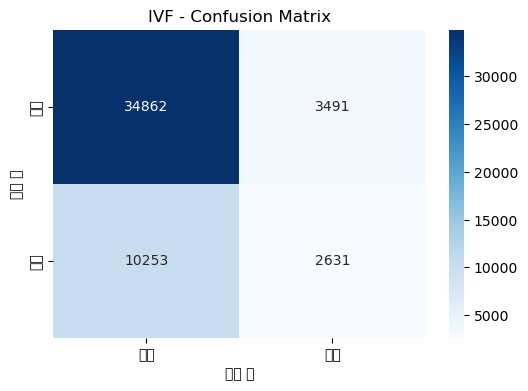


📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84     38353
         1.0       0.43      0.20      0.28     12884

    accuracy                           0.73     51237
   macro avg       0.60      0.56      0.56     51237
weighted avg       0.69      0.73      0.69     51237


📌 DI 데이터 모델 학습 시작...

🔹 상위 중요 변수:
               변수       중요도
35      정자 기증자 나이  0.173770
0        시술 시기 코드  0.161474
1        시술 당시 나이  0.108789
23  클리닉 내 총 시술 횟수  0.097559
25       DI 시술 횟수  0.080832
22        총 시술 횟수  0.068828
24      IVF 시술 횟수  0.057171
3        배란 자극 여부  0.046036
13  불임 원인 - 남성 요인  0.038831
28       DI 임신 횟수  0.017709

✅ 유의수준 0.05 이하로 유의미한 변수 목록:
['시술 시기 코드', '시술 당시 나이', '배란 자극 여부', '남성 주 불임 원인', '여성 주 불임 원인', '부부 주 불임 원인', '불명확 불임 원인', '불임 원인 - 남성 요인', '총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'DI 출산 횟수']

🎯 DI 모델 정확도: 0.8546

📌 Confusion Matrix (혼동 행렬):
[[1065   22]
 [ 161   11]]


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current fo

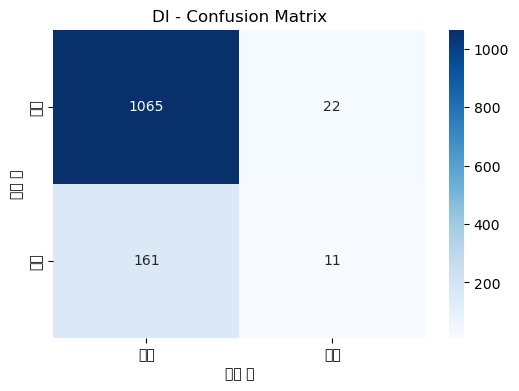


📌 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1087
           1       0.33      0.06      0.11       172

    accuracy                           0.85      1259
   macro avg       0.60      0.52      0.51      1259
weighted avg       0.80      0.85      0.81      1259


✅ 모든 모델 학습 완료!


In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import chi2_contingency

# 📌 IVF & DI 데이터 준비
df_parts = {"IVF": df_IVF, "DI": df_DI}

# 📌 종속변수 설정 (임신 성공 여부)
target_col = "임신 성공 여부"

# 📌 유의수준 설정
alpha = 0.05

# 📌 IVF & DI 각각 모델 학습
for df_name, df_part in df_parts.items():
    print(f"\n📌 {df_name} 데이터 모델 학습 시작...")

    # ✅ 독립변수(X) & 종속변수(y) 설정
    X = df_part.drop(columns=[target_col], errors="ignore")
    y = df_part[target_col]

    # ✅ 학습 데이터 & 테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ✅ 모델 학습 (랜덤포레스트 사용)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # ✅ 변수 중요도 출력
    feature_importance = pd.DataFrame({
        "변수": X.columns,
        "중요도": model.feature_importances_
    }).sort_values(by="중요도", ascending=False)

    print("\n🔹 상위 중요 변수:")
    print(feature_importance.head(10))

    # ✅ 유의수준 0.05 기반 유의미한 변수 찾기 (카이제곱 검정)
    significant_vars = []
    for col in X.columns:
        contingency_table = pd.crosstab(X[col], y)
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        if p_value < alpha:
            significant_vars.append(col)

    print("\n✅ 유의수준 0.05 이하로 유의미한 변수 목록:")
    print(significant_vars)

    # ✅ 모델 성능 평가
    accuracy = model.score(X_test, y_test)
    print(f"\n🎯 {df_name} 모델 정확도: {accuracy:.4f}")

    # ✅ 예측값 생성
    y_pred = model.predict(X_test)

    # ✅ Confusion Matrix 계산
    cm = confusion_matrix(y_test, y_pred)

    # ✅ Confusion Matrix 출력
    print("\n📌 Confusion Matrix (혼동 행렬):")
    print(cm)

    # ✅ Confusion Matrix 시각화
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["실패", "성공"], yticklabels=["실패", "성공"])
    plt.xlabel("예측 값")
    plt.ylabel("실제 값")
    plt.title(f"{df_name} - Confusion Matrix")
    plt.show()

    # ✅ 정밀도, 재현율, F1-Score 출력
    print("\n📌 Classification Report:")
    print(classification_report(y_test, y_pred))

print("\n✅ 모든 모델 학습 완료!")

In [145]:
# 📌 IVF와 DI의 '임신 성공 여부' 분포 확인
for df_name, df_part in {"IVF": df_IVF, "DI": df_DI}.items():
    print(f"\n📌 {df_name} 데이터 '임신 성공 여부' 분포:")
    print(df_part["임신 성공 여부"].value_counts())
    
    # 비율 계산
    success_rate = df_part["임신 성공 여부"].mean()
    print(f"✅ {df_name} 데이터 성공률: {success_rate * 100:.2f}%")


📌 IVF 데이터 '임신 성공 여부' 분포:
임신 성공 여부
0.0    190767
1.0     65417
Name: count, dtype: int64
✅ IVF 데이터 성공률: 25.54%

📌 DI 데이터 '임신 성공 여부' 분포:
임신 성공 여부
0    5480
1     811
Name: count, dtype: int64
✅ DI 데이터 성공률: 12.89%



📌 IVF 데이터 균형 조정 시작...
✅ 데이터 균형 조정 완료! 원본: 256184 → 변환 후: 231644

📌 DI 데이터 균형 조정 시작...
✅ 데이터 균형 조정 완료! 원본: 6291 → 변환 후: 6654

🎯 IVF 모델 정확도: 0.7262

🔹 상위 중요 변수:
                  변수       중요도
0           시술 시기 코드  0.089158
62         배아 이식 경과일  0.085587
35         총 생성 배아 수  0.071159
44       수집된 신선 난자 수  0.068919
1           시술 당시 나이  0.066542
38          이식된 배아 수  0.066169
46          혼합된 난자 수  0.050394
40          저장된 배아 수  0.048453
47  파트너 정자와 혼합된 난자 수  0.043395
26     클리닉 내 총 시술 횟수  0.032021


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current fo

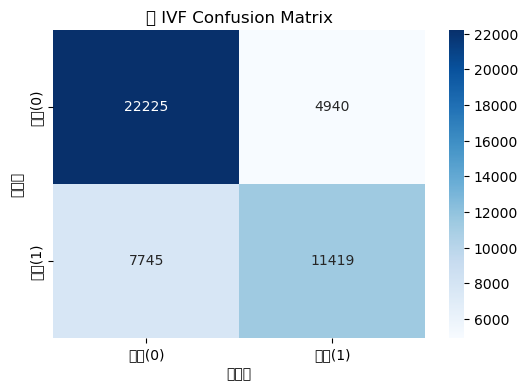


📌 Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78     27165
         1.0       0.70      0.60      0.64     19164

    accuracy                           0.73     46329
   macro avg       0.72      0.71      0.71     46329
weighted avg       0.72      0.73      0.72     46329


🎯 DI 모델 정확도: 0.8573

🔹 상위 중요 변수:
               변수       중요도
1        시술 당시 나이  0.164397
35      정자 기증자 나이  0.132644
0        시술 시기 코드  0.130293
23  클리닉 내 총 시술 횟수  0.091152
25       DI 시술 횟수  0.087138
22        총 시술 횟수  0.075374
24      IVF 시술 횟수  0.061503
26        총 임신 횟수  0.036489
28       DI 임신 횟수  0.035334
3        배란 자극 여부  0.031856


/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/seaborn/utils.py:61: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current fo

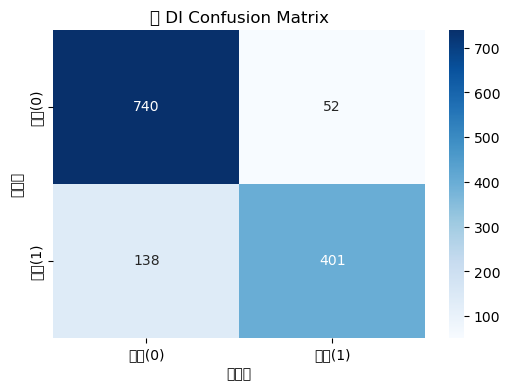


📌 Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       792
           1       0.89      0.74      0.81       539

    accuracy                           0.86      1331
   macro avg       0.86      0.84      0.85      1331
weighted avg       0.86      0.86      0.85      1331


✅ 모든 모델 학습 완료!


In [149]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# 📌 IVF & DI 데이터 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# ✅ SMOTE + 언더샘플링 적용 함수
def balance_data(df, target_col="임신 성공 여부"):
    X = df.drop(columns=[target_col])  # 타겟 컬럼 제외
    y = df[target_col]

    # ✅ 샘플링 전략 설정 (성공 데이터를 실패 데이터의 50%로 맞춤)
    smote = SMOTE(sampling_strategy=0.5, random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # 실패 데이터 일부 제거

    # ✅ SMOTE + 언더샘플링 적용
    pipeline = Pipeline([('SMOTE', smote), ('UNDER', under)])
    X_resampled, y_resampled = pipeline.fit_resample(X, y)

    print(f"✅ 데이터 균형 조정 완료! 원본: {df.shape[0]} → 변환 후: {X_resampled.shape[0]}")
    
    # ✅ 새로운 데이터프레임 생성
    df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
    df_balanced[target_col] = y_resampled
    return df_balanced

# 📌 IVF & DI 각각 데이터 균형 조정
for df_name, df_part in df_parts.items():
    print(f"\n📌 {df_name} 데이터 균형 조정 시작...")
    df_parts[df_name] = balance_data(df_part)

# ✅ 모델 학습 함수 (가중치 조정 추가)
def train_and_evaluate_model(df, dataset_name):
    # 📌 X, y 분리
    X = df.drop(columns=["임신 성공 여부"])
    y = df["임신 성공 여부"]

    # 📌 데이터 분할 (80% 학습, 20% 테스트)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 📌 모델 학습 (가중치 조정 추가)
    model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)

    # 📌 예측
    y_pred = model.predict(X_test)

    # 📌 평가 지표
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n🎯 {dataset_name} 모델 정확도: {accuracy:.4f}")

    # 📌 변수 중요도 출력
    feature_importance = pd.DataFrame({
        "변수": X.columns,
        "중요도": model.feature_importances_
    }).sort_values(by="중요도", ascending=False)

    print("\n🔹 상위 중요 변수:")
    print(feature_importance.head(10))

    # 📌 Confusion Matrix 시각화
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["실패(0)", "성공(1)"], yticklabels=["실패(0)", "성공(1)"])
    plt.xlabel("예측값")
    plt.ylabel("실제값")
    plt.title(f"📌 {dataset_name} Confusion Matrix")
    plt.show()

    # 📌 Classification Report 출력
    print("\n📌 Classification Report:")
    print(classification_report(y_test, y_pred))

# 📌 IVF & DI 모델 학습 실행
for df_name, df_part in df_parts.items():
    train_and_evaluate_model(df_part, df_name)

print("\n✅ 모든 모델 학습 완료!")

In [ ]:
여기서부터 개판

In [153]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, MinMaxScaler

# ✅ IVF & DI 데이터 준비
df_parts = {"IVF": df_IVF.copy(), "DI": df_DI.copy()}

# --------------------------------------- "알 수 없음"을 -1로 변경 ---------------------------------------------------
columns_to_replace = ["시술 당시 나이", "난자 출처", "난자 기증자 나이", "정자 기증자 나이", "배란 유도 유형", "배아 생성 주요 이유"]

for df_name, df_part in df_parts.items():
    for col in columns_to_replace:
        if col in df_part.columns:
            df_part[col] = df_part[col].replace("알 수 없음", -1)

# --------------------------------------- Label Encoding ---------------------------------------------------
label_encode_columns = [
    "시술 시기 코드", "시술 당시 나이", "배란 유도 유형", "총 시술 횟수", "클리닉 내 총 시술 횟수",
    "IVF 시술 횟수", "DI 시술 횟수", "총 임신 횟수", "IVF 임신 횟수", "DI 임신 횟수",
    "총 출산 횟수", "IVF 출산 횟수", "DI 출산 횟수", "난자 출처", "정자 출처",
    "난자 기증자 나이", "정자 기증자 나이"
]

for df_name, df_part in df_parts.items():
    for col in label_encode_columns:
        if col in df_part.columns:
            le = LabelEncoder()
            unique_values = df_part.loc[df_part[col] != -1, col].unique()
            le.fit(unique_values)
            df_part[col] = df_part[col].apply(lambda x: -1 if x == -1 else le.transform([x])[0])

# --------------------------------------- 원-핫 인코딩 (배아 생성 주요 이유) ---------------------------------------------------
if "배아 생성 주요 이유" in df_IVF.columns:
    df_IVF["배아 생성 주요 이유"] = df_IVF["배아 생성 주요 이유"].astype(str).apply(lambda x: x.split(',') if x != "-1" else [])

    mlb = MultiLabelBinarizer()
    encoded_배아생성 = mlb.fit_transform(df_IVF["배아 생성 주요 이유"])
    encoded_배아생성_df = pd.DataFrame(encoded_배아생성, columns=[f"배아 생성 주요 이유_{c}" for c in mlb.classes_])

    df_IVF.drop("배아 생성 주요 이유", axis=1, inplace=True)
    df_IVF = pd.concat([df_IVF, encoded_배아생성_df], axis=1)

# --------------------------------------- 특정 시술 유형 처리 ---------------------------------------------------
valid_treatments = {"IVF", "IUI", "FER", "IVI", "BLASTOCYST", "AH", "GIFT", "ICI", "Generic DI", "ICSI", "Unknown"}

for df_name, df_part in df_parts.items():
    if "특정 시술 유형" in df_part.columns:
        for treatment in valid_treatments:
            df_part[f"특정 시술 - {treatment}"] = (df_part["특정 시술 유형"] == treatment).astype(int)

        df_part["특정 시술 - MIXED"] = 0
        mixed_values = df_part[~df_part["특정 시술 유형"].isin(valid_treatments)]["특정 시술 유형"]

        if not mixed_values.empty:
            train_encoded = LabelEncoder().fit_transform(mixed_values) + 1
            df_part.loc[~df_part["특정 시술 유형"].isin(valid_treatments), "특정 시술 - MIXED"] = train_encoded

        df_part.drop(columns=["특정 시술 유형"], inplace=True)

# --------------------------------------- 정규화 (MinMaxScaler) ---------------------------------------------------
for df_name, df_part in df_parts.items():
    non_binary_columns = [col for col in df_part.columns if df_part[col].nunique() > 2]

    if len(non_binary_columns) > 0:
        print(f"📌 {df_name} 데이터에서 정규화가 필요한 변수 목록:")
        print(non_binary_columns)

        # NaN 값이 없도록 보장
        df_part.fillna(0, inplace=True)

        # Min-Max Scaling 적용
        scaler = MinMaxScaler()
        df_part[non_binary_columns] = scaler.fit_transform(df_part[non_binary_columns])

        print(f"✅ {df_name} 데이터 정규화 적용 완료!")
    else:
        print(f"✅ {df_name} 데이터는 0 또는 1 값만 가짐 → 정규화 불필요.")

# ✅ IVF & DI 모델 학습 함수
def train_model(df, dataset_name):
    print(f"\n📌 {dataset_name} 데이터 모델 학습 시작...")

    # 🎯 데이터 분할
    X = df.drop(columns=["임신 성공 여부"])
    y = df["임신 성공 여부"]

    # ✅ Train-Test Split (80:20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ✅ 모델 학습 (랜덤 포레스트)
    model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)

    return model

# ✅ IVF & DI 모델 학습
models = {df_name: train_model(df_part, df_name) for df_name, df_part in df_parts.items()}

# ✅ 테스트 데이터 로드
test_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/test.csv"
df_test = pd.read_csv(test_path)

# ✅ 'ID' 컬럼 저장
test_ids = df_test["ID"]

# ✅ 테스트 데이터 전처리
df_test_processed = preprocess_test_data(df_test)

# ✅ 예측 및 확률 계산
probabilities = []

for index, row in df_test.iterrows():
    treatment_type = row["시술 유형"]

    if treatment_type == "IVF":
        prob = models["IVF"].predict([row.drop("시술 유형")])[0]
    elif treatment_type == "DI":
        prob = models["DI"].predict([row.drop("시술 유형")])[0]
    else:
        prob = np.nan  # 잘못된 데이터

    probabilities.append(prob)

# ✅ 결과 데이터프레임 생성
df_results = pd.DataFrame({
    "ID": test_ids,
    "Probability": probabilities
})

# ✅ CSV 파일 저장
output_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/test_predictions.csv"
df_results.to_csv(output_path, index=False)

print(f"\n✅ 예측 완료! 결과 저장: {output_path}")

📌 IVF 데이터에서 정규화가 필요한 변수 목록:
['시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '배란 유도 유형', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '총 생성 배아 수', '미세주입된 난자 수', '미세주입에서 생성된 배아 수', '이식된 배아 수', '미세주입 배아 이식 수', '저장된 배아 수', '미세주입 후 저장된 배아 수', '해동된 배아 수', '해동 난자 수', '수집된 신선 난자 수', '저장된 신선 난자 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '기증자 정자와 혼합된 난자 수', '난자 출처', '정자 출처', '난자 기증자 나이', '정자 기증자 나이', '난자 혼합 경과일', '배아 이식 경과일', '배아 해동 경과일', '특정 시술 - MIXED']
✅ IVF 데이터 정규화 적용 완료!
📌 DI 데이터에서 정규화가 필요한 변수 목록:
['시술 시기 코드', '시술 당시 나이', '임신 시도 또는 마지막 임신 경과 연수', '총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수', 'DI 시술 횟수', '총 임신 횟수', 'IVF 임신 횟수', 'DI 임신 횟수', '총 출산 횟수', 'IVF 출산 횟수', 'DI 출산 횟수', '정자 기증자 나이']
✅ DI 데이터 정규화 적용 완료!

📌 IVF 데이터 모델 학습 시작...

📌 DI 데이터 모델 학습 시작...


NameError: name 'preprocess_test_data' is not defined

In [155]:
import joblib
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# 📌 IVF & DI 데이터 리스트
df_parts = {"IVF": df_IVF, "DI": df_DI}

# ✅ SMOTE + 언더샘플링 적용 함수
def balance_data(df, target_col="임신 성공 여부"):
    X = df.drop(columns=[target_col])  # 타겟 컬럼 제외
    y = df[target_col]

    # ✅ 샘플링 전략 설정 (성공 데이터를 실패 데이터의 50%로 맞춤)
    smote = SMOTE(sampling_strategy=0.5, random_state=42)
    under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # 실패 데이터 일부 제거

    # ✅ SMOTE + 언더샘플링 적용
    pipeline = Pipeline([('SMOTE', smote), ('UNDER', under)])
    X_resampled, y_resampled = pipeline.fit_resample(X, y)

    print(f"✅ 데이터 균형 조정 완료! 원본: {df.shape[0]} → 변환 후: {X_resampled.shape[0]}")
    
    # ✅ 새로운 데이터프레임 생성
    df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
    df_balanced[target_col] = y_resampled
    return df_balanced

# 📌 IVF & DI 각각 데이터 균형 조정
for df_name, df_part in df_parts.items():
    print(f"\n📌 {df_name} 데이터 균형 조정 시작...")
    df_parts[df_name] = balance_data(df_part)

# ✅ 모델 학습 및 저장 함수
def train_and_save_model(df, dataset_name):
    # 📌 X, y 분리
    X = df.drop(columns=["임신 성공 여부"])
    y = df["임신 성공 여부"]

    # 📌 데이터 분할 (80% 학습, 20% 테스트)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 📌 모델 학습 (가중치 조정 추가)
    model = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
    model.fit(X_train, y_train)

    # 📌 모델 저장
    model_path = f"/Users/yudayeon/Desktop/캡스톤_결과/open/{dataset_name}_model.pkl"
    joblib.dump(model, model_path)
    print(f"\n✅ {dataset_name} 모델 저장 완료: {model_path}")

# 📌 IVF & DI 모델 학습 및 저장 실행
for df_name, df_part in df_parts.items():
    train_and_save_model(df_part, df_name)

print("\n✅ 모든 모델 학습 및 저장 완료!")


📌 IVF 데이터 균형 조정 시작...
✅ 데이터 균형 조정 완료! 원본: 256184 → 변환 후: 231644

📌 DI 데이터 균형 조정 시작...
✅ 데이터 균형 조정 완료! 원본: 6291 → 변환 후: 6654

✅ IVF 모델 저장 완료: /Users/yudayeon/Desktop/캡스톤_결과/open/IVF_model.pkl

✅ DI 모델 저장 완료: /Users/yudayeon/Desktop/캡스톤_결과/open/DI_model.pkl

✅ 모든 모델 학습 및 저장 완료!


In [157]:
import joblib
import pandas as pd
import numpy as np

# 📌 모델 로드
ivf_model = joblib.load("/Users/yudayeon/Desktop/캡스톤_결과/open/IVF_model.pkl")
di_model = joblib.load("/Users/yudayeon/Desktop/캡스톤_결과/open/DI_model.pkl")

# ✅ 테스트 데이터 로드
test_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/test.csv"
df_test = pd.read_csv(test_path)

# ✅ 'ID' 컬럼 저장
test_ids = df_test["ID"]

# ✅ 테스트 데이터 전처리 (IVF와 DI 전처리 방식 동일하게 적용)
df_test_processed = preprocess_test_data(df_test)

# ✅ 예측 및 확률 계산
probabilities = []

for index, row in df_test_processed.iterrows():
    treatment_type = row["시술 유형"]

    if treatment_type == "IVF":
        prob = ivf_model.predict([row.drop("시술 유형")])[0]
    elif treatment_type == "DI":
        prob = di_model.predict([row.drop("시술 유형")])[0]
    else:
        prob = np.nan  # 잘못된 데이터

    probabilities.append(prob)

# ✅ 결과 데이터프레임 생성
df_results = pd.DataFrame({
    "ID": test_ids,
    "Probability": probabilities
})

# ✅ CSV 파일 저장
output_path = "/Users/yudayeon/Desktop/캡스톤_결과/open/test_predictions.csv"
df_results.to_csv(output_path, index=False)

print(f"\n✅ 예측 완료! 결과 저장: {output_path}")

NameError: name 'preprocess_test_data' is not defined